<a href="https://colab.research.google.com/github/innosoft21/workspace/blob/main/tensorflow_R/Tensorflow_Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Tensorflow Iris deep learning

In [4]:
devtools::install_github("rstudio/keras")
library(keras)
library(tensorflow)
iris <- iris
install.packages("corrplot")
library(corrplot)

Skipping install of 'keras' from a github remote, the SHA1 (67b3f185) has not changed since last install.
  Use `force = TRUE` to force installation

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

corrplot 0.84 loaded



0.8037728,0.5516088,0.2206435,0.03152050,0
0.8281329,0.5070201,0.2366094,0.03380134,0
0.8053331,0.5483119,0.2227517,0.03426949,0
0.8000302,0.5391508,0.2608794,0.03478392,0
0.7909650,0.5694948,0.2214702,0.03163860,0
0.7841750,0.5663486,0.2468699,0.05808704,0


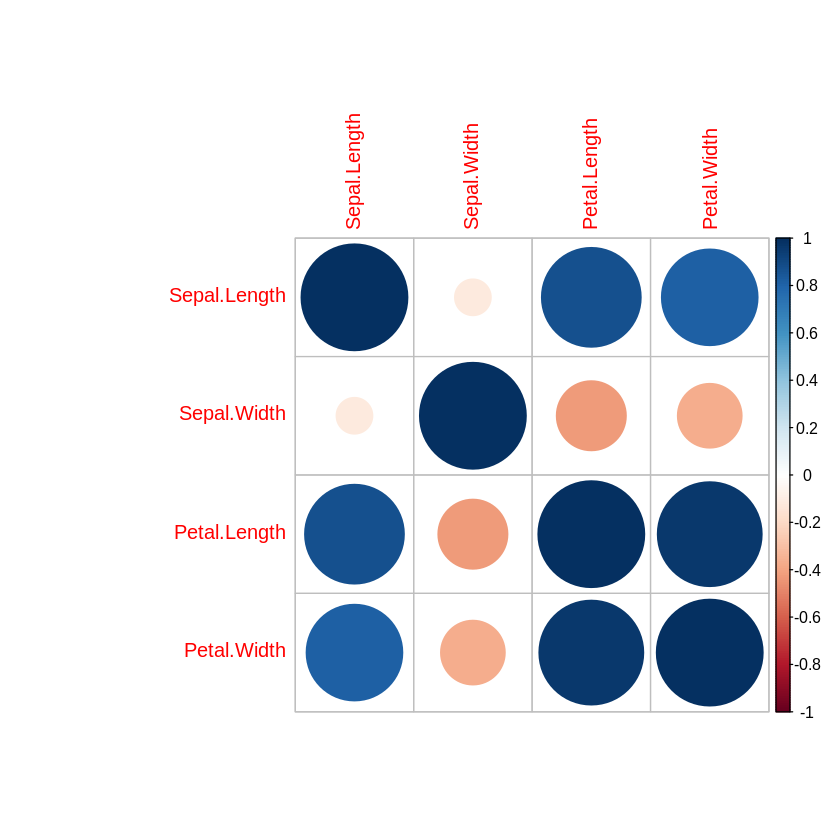

In [5]:
M <- cor(iris[,1:4])
corrplot(M, method="circle")
iris[,5] <- as.numeric(as.factor(unlist(iris[,5]))) -1
iris <- as.matrix(iris)
dimnames(iris) <- NULL
iris_x <- normalize(iris[,1:4])
iris_mat <- cbind(iris_x, iris[,5])
head(iris_mat)
ind <- sample(2, nrow(iris_mat), replace=TRUE, prob=c(0.67, 0.33))
iris.training <- iris_mat[ind==1, 1:4]
iris.test <- iris_mat[ind==2, 1:4]
iris.trainingtarget <- iris_mat[ind==1, 5]
iris.testtarget <- iris_mat[ind==2, 5]
iris.trainLabels <- to_categorical(iris.trainingtarget)
iris.testLabels <- to_categorical(iris.testtarget)

In [6]:
set.seed(777)
model <- keras_model_sequential()
model %>%
  layer_dense(units = 8, activation = 'relu', input_shape = c(4)) %>%
  layer_dense(units = 3, activation = 'softmax')
summary(model)
get_config(model)
get_layer(model, index = 1)
model$layers
model %>% compile(
  loss = 'categorical_crossentropy',
  optimizer = 'adam',
  metrics = 'accuracy'
)
model %>% fit(
  iris.training,
  iris.trainLabels,
  epochs = 500,
  batch_size = 5,
  validation_split = 0.1
)
classes <- model %>% predict_classes(iris.test, batch_size = 128)
table(iris.testtarget, classes)
score <- model %>% evaluate(iris.test, iris.testLabels, batch_size = 128)
print(score)


Model: "sequential"
________________________________________________________________________________
Layer (type)                        Output Shape                    Param #     
dense_1 (Dense)                     (None, 8)                       40          
________________________________________________________________________________
dense (Dense)                       (None, 3)                       27          
Total params: 67
Trainable params: 67
Non-trainable params: 0
________________________________________________________________________________


{'name': 'sequential', 'layers': [{'class_name': 'InputLayer', 'config': {'batch_input_shape': (None, 4), 'dtype': 'float32', 'sparse': False, 'ragged': False, 'name': 'dense_1_input'}}, {'class_name': 'Dense', 'config': {'name': 'dense_1', 'trainable': True, 'batch_input_shape': (None, 4), 'dtype': 'float32', 'units': 8, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'class_name': 'GlorotUniform', 'config': {'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}}, {'class_name': 'Dense', 'config': {'name': 'dense', 'trainable': True, 'dtype': 'float32', 'units': 3, 'activation': 'softmax', 'use_bias': True, 'kernel_initializer': {'class_name': 'GlorotUniform', 'config': {'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regulari

<tensorflow.python.keras.layers.core.Dense>

[[1]]
<tensorflow.python.keras.layers.core.Dense>

[[2]]
<tensorflow.python.keras.layers.core.Dense>


               classes
iris.testtarget  0  1  2
              0 16  0  0
              1  0 19  0
              2  0  3 16

     loss  accuracy 
0.2355337 0.9444444 
